# Matplotlib Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

In [2]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

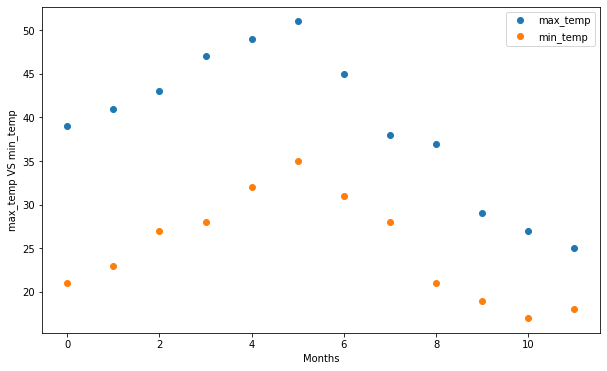

In [7]:
plt.rcParams['figure.figsize'][0]=10
plt.rcParams['figure.figsize'][1]=6
plt.plot(months, max_temp, 'o', label = 'max_temp')
plt.plot(months, min_temp, 'o', label = 'min_temp')
plt.xlabel('Months')
plt.ylabel('max_temp VS min_temp')
plt.legend()
plt.show()

In [8]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, min_temp, [-40, 20, 0])

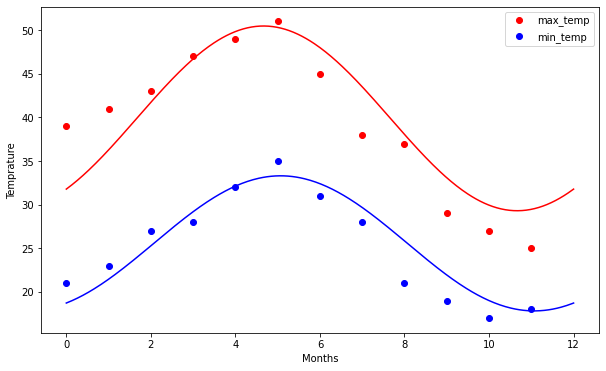

In [10]:
days = np.linspace(0,12, num=365)
plt.rcParams['figure.figsize'][0] = 10
plt.rcParams['figure.figsize'][1] = 6
plt.plot(months,max_temp,'ro',label = 'max_temp')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months,min_temp,'bo',label = 'min_temp')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Months')
plt.ylabel('Temprature')
plt.legend()
plt.show()

In [11]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
sex_category = df['sex'].value_counts()
sex_category

male      843
female    466
Name: sex, dtype: int64

In [21]:
lscat = sex_category.index.tolist()
lsval = sex_category.values.tolist()

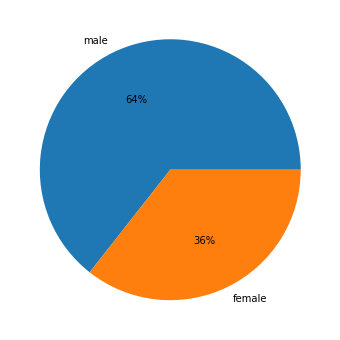

In [22]:
plt.pie(lsval,labels = lscat, autopct = '%1.f%%')
plt.show()

In [28]:
lscat

['male', 'female']

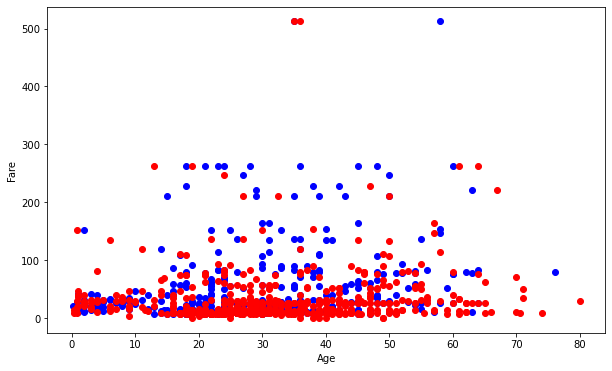

In [33]:
for a in df['sex'].unique():
    dfa = df[df['sex'] == a]
    if a == 'male':
        plt.scatter(x = dfa['age'], y = dfa['fare'], label = a, color = 'r')
    elif a == 'female':
        plt.scatter(x = dfa['age'], y = dfa['fare'], label = a, color = 'b')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()